In [8]:
import urllib.request
wiki="http://www.somesite.com/details.pl?urn=2344"
page=urllib.request.urlopen(wiki)
from bs4 import BeautifulSoup
soup=BeautifulSoup(page)
print(soup.prettify())

<html>
 <head>
  <title>
   www.somesite.com
  </title>
 </head>
 <body>
  <h1>
   www.somesite.com
  </h1>
  <p>
   Coming soon.
  </p>
 </body>
</html>



In [9]:
print(soup.title)

<title>www.somesite.com</title>


In [10]:
print(soup.title.string)

www.somesite.com


In [11]:
all_tables=soup.find_all('table')
all_tables

[]

In [38]:
import numpy as np
import pandas as pd
data1 = pd.read_csv('Desktop/Data1.csv')
data3 = pd.read_csv('Desktop/Data3.csv')
data1

,x1,x2
0,a,11.432
1,b,1.303
2,d,99.906


In [39]:
data3

,x1,x3
0,a,20.784
1,b,NaN
2,c,20.784


In [40]:
pd.merge(data1,data3,how='left',on='x1')

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN
2,d,99.906,NaN


In [41]:
#pd.merge(data1,data3,how='right',on='x1')
pd.merge(data3,data1,how='right',on='x1')

,x1,x3,x2
0,a,20.784,11.432
1,b,NaN,1.303
2,d,NaN,99.906


In [42]:
pd.merge(data1,data3,how='outer',on='x1')

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN
2,d,99.906,NaN
3,c,NaN,20.784


In [45]:
import pandas as pd
data = {'A': [1,2,3,1,2],
        'B': ['a','b','c','a','b']}
df = pd.DataFrame(data)
duplicate_rows = df.duplicated()
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
0    False
1    False
2    False
3     True
4     True
dtype: bool


In [56]:
import pandas as pd
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
        'Age': [25, 30, 35, 25, 30],
        'Salary': [50000, 60000, 70000, 55000, 65000]}
df = pd.DataFrame(data)
grouped = df.groupby('Name')
print("Grouped rows:")
for age, group in grouped:
    print(group)
    print()
#print(df.groupby('Name').head())

Grouped rows:
    Name  Age  Salary
0  Alice   25   50000
3  Alice   25   55000

  Name  Age  Salary
1  Bob   30   60000
4  Bob   30   65000

      Name  Age  Salary
2  Charlie   35   70000



In [58]:
mean_salary = grouped['Salary'].mean()
print("Mean salary for each group:")
print(mean_salary)

Mean salary for each group:
Name
Alice      52500.0
Bob        62500.0
Charlie    70000.0
Name: Salary, dtype: float64


In [63]:
grouped_multiple = df.groupby(['Name', 'Age'])

In [65]:
print(grouped['Salary'].agg(['mean', 'sum']))

            mean     sum
Name                    
Alice    52500.0  105000
Bob      62500.0  125000
Charlie  70000.0   70000


In [69]:
def salary_range(series):
    return series.max() - series.min()
print("Salary range for each groups:")
print(grouped['Salary'].agg(salary_range))

Salary range for each groups:
Name
Alice      5000
Bob        5000
Charlie       0
Name: Salary, dtype: int64


In [70]:
z_score = grouped['Salary'].transform(lambda x: (x - x.mean()) / x.std())
df['Salary_ZScore'] = z_score
print(z_score)

0   -0.707107
1   -0.707107
2         NaN
3    0.707107
4    0.707107
Name: Salary, dtype: float64


In [86]:
import pandas as pd
data = {'A': [1, 2, None, 4],
        'B': [None, 5, 6, 7],
        'C': [8, 9, 10, 11]}
df = pd.DataFrame(data)
df

,A,B,C
0,1.0,NaN,8
1,2.0,5.0,9
2,NaN,6.0,10
3,4.0,7.0,11


In [87]:
print("Missing data:")
print(df.isna())

Missing data:
       A      B      C
0  False   True  False
1  False  False  False
2   True  False  False
3  False  False  False


In [79]:
print(df.isnull())

       A      B      C
0  False   True  False
1  False  False  False
2   True  False  False
3  False  False  False


In [82]:
df_cleaned_rows = df.dropna()
df_cleaned_columns = df.dropna(axis=1)
df_cleaned_rows

,A,B,C
1,2.0,5.0,9
3,4.0,7.0,11


In [83]:
df_cleaned_columns

,C
0,8
1,9
2,10
3,11


In [91]:
df.filled = df.fillna(df.mean())
df.filled

,A,B,C
0,1.000000,6.0,8
1,2.000000,5.0,9
2,2.333333,6.0,10
3,4.000000,7.0,11


In [90]:
df.filled_specific = df.fillna(value=0)
df.filled_specific

,A,B,C
0,1.0,0.0,8
1,2.0,5.0,9
2,0.0,6.0,10
3,4.0,7.0,11


In [96]:
df_filled_ffill = df.ffill()
df_filled_ffill

,A,B,C
0,1.0,NaN,8
1,2.0,5.0,9
2,2.0,6.0,10
3,4.0,7.0,11


In [97]:
df_filled_bfill = df.bfill()
df_filled_bfill

,A,B,C
0,1.0,5.0,8
1,2.0,5.0,9
2,4.0,6.0,10
3,4.0,7.0,11


In [101]:
import pandas as pd
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
        'Age': [25, 30, 35, 25, 30],
        'Salary': [50000, 60000, 70000, 55000, 65000]}
df = pd.DataFrame(data)
pd.melt(df, id_vars=["Name"],
        value_vars=["Age", "Salary"],
        value_name="Observations")

,Name,variable,Observations
0,Alice,Age,25
1,Bob,Age,30
2,Charlie,Age,35
3,Alice,Age,25
4,Bob,Age,30
5,Alice,Salary,50000
6,Bob,Salary,60000
7,Charlie,Salary,70000
8,Alice,Salary,55000
9,Bob,Salary,65000


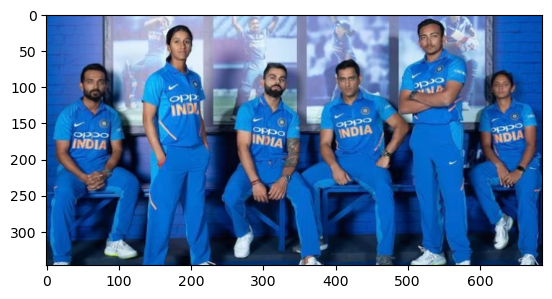

In [109]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
img = mpimg.imread('Downloads/cricket.png')
plt.imshow(img)

In [110]:
df=pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.471270,1.143139,-1.048674,0.973796
1,-0.875542,-0.679467,0.964902,0.146822
2,-2.366461,-0.037566,-1.329141,-0.368575
3,-0.499277,-1.697117,0.040193,0.474496
4,-2.673027,0.885447,-0.497499,-1.386571
5,-0.958618,0.703557,1.432841,-0.384420
6,-0.446335,-0.507085,-0.672748,0.721935
7,-2.210587,-1.549998,-2.025647,-1.040147
8,-0.092531,-0.510723,-0.647540,0.823972
9,-0.285564,0.632518,-1.088964,0.209036


In [111]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.471270  1.143139 -1.048674  0.973796
 1 -0.875542 -0.679467  0.964902  0.146822
 2 -2.366461 -0.037566 -1.329141 -0.368575,
           0         1         2         3
 3 -0.499277 -1.697117  0.040193  0.474496
 4 -2.673027  0.885447 -0.497499 -1.386571
 5 -0.958618  0.703557  1.432841 -0.384420
 6 -0.446335 -0.507085 -0.672748  0.721935,
           0         1         2         3
 7 -2.210587 -1.549998 -2.025647 -1.040147
 8 -0.092531 -0.510723 -0.647540  0.823972
 9 -0.285564  0.632518 -1.088964  0.209036]

In [112]:
pd.concat(pieces)

,0,1,2,3
0,-1.471270,1.143139,-1.048674,0.973796
1,-0.875542,-0.679467,0.964902,0.146822
2,-2.366461,-0.037566,-1.329141,-0.368575
3,-0.499277,-1.697117,0.040193,0.474496
4,-2.673027,0.885447,-0.497499,-1.386571
5,-0.958618,0.703557,1.432841,-0.384420
6,-0.446335,-0.507085,-0.672748,0.721935
7,-2.210587,-1.549998,-2.025647,-1.040147
8,-0.092531,-0.510723,-0.647540,0.823972
9,-0.285564,0.632518,-1.088964,0.209036


In [116]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [117]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [4, 5]})
right

,key,lval
0,foo,4
1,foo,5
